<a href="https://colab.research.google.com/github/karthikpuranik11/FIRE2021/blob/main/Tamil/ULMFiT_Tamil_all.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
train1=pd.read_csv('/content/tam_final.csv')
train1

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,text,category,trans,translate
0,0,0,0,Vani bhojam fans hit like solli 500 like Vangi...,unknown_state,வாணி பூஜாம் பான்ஸ் ஹிட் லிக் சொல்லி 500 லிக் வ...,Vani Pujan Pans Hit Leak: Get 500 Leak Banks\n
1,1,1,1,I love you ajith very I like,Positive,ஐஸ் லோவ் யூ அஜித் வேரி ஐஸ் லிக்,Ice Love You Ajith very Ice Lick\n
2,2,2,2,ennaya trailer Ku mudi Ellam nikkudhu... Vera ...,Positive,எண்ணய டிரைலர் கூ முடி எல்லம் நிக்குது... வேற ல...,The oil trailer has all the hair and the trail...
3,3,3,3,Vijay Annaa Ur Maassssss Therrrrriiiiii,Positive,விஜய் அன்னா உர் மாசஸ் தெற்றி,Vijay Anna Ur Masse Thetti\n
4,4,4,4,நம்ப நடே நாசாமா தான் போச்சி,Negative,நம்ப நடே நாசாமா தான் போச்சி,Believe it or not\n
...,...,...,...,...,...,...,...
35651,35651,35651,35651,ஒருவர் செய்த தவறுக்காக எல்லாரையும் பழி போடுவது...,Mixed_feelings,ஒருவர் செய்த தவறுக்காக எல்லாரையும் பழி போடுவது...,It is wrong to blame everyone for a mistake.\n
35652,35652,35652,35652,Repeated Mode to Watching Theri Trailer & Ther...,Positive,ரிப்பியட்டா மோடு டோ வாட்சிங் தேரி டிரைலர் & தே...,For details: Phone call between Prime Minister...
35653,35653,35653,35653,yeevanikuachu pula kutti erudhal oodi poyidu....,Negative,எவனிகுசு புல குட்டி ஏறுதல் ஓடி போயிடு. மவானி க...,"Run away, run away, run away!\n"
35654,35654,35654,35654,She is looking like laughing budha,Positive,ஷே ஐஸ் லூகிங் லிக் லூகிங் புத,She-Ice Looking Lick Looking Buddha\n


In [4]:
for i in range(len(train1)):
  train1['trans'][i]=train1['trans'][i][8:-2]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
for i in range(len(train1)):
  if train1['category'][i]=='not-Tamil':
    train1['trans'][i]='NaN'
    train1['translate'][i]='NaN'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [9]:
train2=pd.DataFrame(columns=['category','text'])
train2['category']=train1['category'].append(train1['category'] )
train2['text']=train1['text'].append(train1['trans'])
train2

,category,text
0,unknown_state,Vani bhojam fans hit like solli 500 like Vangi...
1,Positive,I love you ajith very I like
2,Positive,ennaya trailer Ku mudi Ellam nikkudhu... Vera ...
3,Positive,Vijay Annaa Ur Maassssss Therrrrriiiiii
4,Negative,நம்ப நடே நாசாமா தான் போச்சி
...,...,...
35651,Mixed_feelings,ெய்த தவறுக்காக எல்லாரையும் பழி போடுவது தவறு நண...
35652,Positive,்டா மோடு டோ வாட்சிங் தேரி டிரைலர் & தேரி சாங்ஸ...
35653,Negative,புல குட்டி ஏறுதல் ஓடி போயிடு. மவானி கோல கண்டி...
35654,Positive,ூகிங் லிக் லூகிங் ப


In [10]:
train=pd.DataFrame(columns=['category','text'])
train['category']=train2['category'].append(train1['category'])
train['text']=train2['text'].append(train1['translate'])
train

,category,text
0,unknown_state,Vani bhojam fans hit like solli 500 like Vangi...
1,Positive,I love you ajith very I like
2,Positive,ennaya trailer Ku mudi Ellam nikkudhu... Vera ...
3,Positive,Vijay Annaa Ur Maassssss Therrrrriiiiii
4,Negative,நம்ப நடே நாசாமா தான் போச்சி
...,...,...
35651,Mixed_feelings,It is wrong to blame everyone for a mistake.\n
35652,Positive,For details: Phone call between Prime Minister...
35653,Negative,"Run away, run away, run away!\n"
35654,Positive,She-Ice Looking Lick Looking Buddha\n


In [11]:
train=train.dropna()

In [12]:
val=pd.read_csv('/content/tamil_sentiment_full_test_withtlabels.tsv', sep="\t")
#val['tweet']=val['text']
#val=val.drop(columns=['Unnamed: 2','text'])
val

,id,text,category
0,Tam_1,வீர செங்குந்தர் சார்பாக இந்த திரைப்படம் வெற்றி...,Positive
1,Tam_2,Teruk ah irukku .... mokke movie .. waste of time,Negative
2,Tam_3,manitha samuthaayam amaipil irunthu intha pada...,Positive
3,Tam_4,JJ mam we miss u,Positive
4,Tam_5,Subtitle me traller dekhne wale like karo,not-Tamil
...,...,...,...
4397,Tam_4398,Ithukum dislike potta kammanattti koovaingalam...,Negative
4398,Tam_4399,Suyama Sinthikiravan than super Hero Seama dia...,Mixed_feelings
4399,Tam_4400,Super thalaiva.... Nee mass dha eppavume,Positive
4400,Tam_4401,பெண்ணை அடிமையாக்க நினைக்கும் இந்த படம் தோல்வித...,unknown_state


In [13]:
df=train.filter(['category','text'], axis=1)
df_test=val.filter(['category','text'],axis=1)

In [14]:
#removing @ and #
def punc(df):
    df['text'] = df['text'].str.replace('[#@()]','')
    print(df)

In [15]:
punc(df)
punc(df_test)

             category                                               text
0       unknown_state  Vani bhojam fans hit like solli 500 like Vangi...
1            Positive                       I love you ajith very I like
2            Positive  ennaya trailer Ku mudi Ellam nikkudhu... Vera ...
3            Positive           Vijay Annaa  Ur Maassssss Therrrrriiiiii
4            Negative                        நம்ப நடே நாசாமா தான் போச்சி
...               ...                                                ...
35651  Mixed_feelings     It is wrong to blame everyone for a mistake.\n
35652        Positive  For details: Phone call between Prime Minister...
35653        Negative                    Run away, run away, run away!\n
35654        Positive              She-Ice Looking Lick Looking Buddha\n
35655        Positive                        North is one of the best!\n

[106968 rows x 2 columns]
            category                                               text
0           Positive  வீர

In [16]:
import fastai
from fastai import *
from fastai.text import * 
from functools import partial
import io
import os

In [17]:
# Language model data
data_lm = TextLMDataBunch.from_df(train_df = df, valid_df = df_test, path = "")

/usr/local/lib/python3.7/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


In [18]:
data_lm.show_batch

<bound method DataBunch.show_batch of TextLMDataBunch;

Train: LabelList (106968 items)
x: LMTextList
xxbos xxmaj vani xxunk fans hit like solli 500 like xxmaj xxunk xxmaj vendiyathu than,xxbos i love you ajith very i like,xxbos ennaya trailer xxmaj ku mudi xxmaj ellam nikkudhu ... xxmaj vera level trailer ..,xxbos xxmaj vijay xxmaj annaa xxmaj ur xxmaj maa xxrep 6 s xxmaj the xxrep 5 r xxrep 6 i,xxbos நம்ப xxunk நாசாமா தான் போச்சி
y: LMLabelList
,,,,
Path: .;

Valid: LabelList (4402 items)
x: LMTextList
xxbos வீர செங்குந்தர் சார்பாக இந்த திரைப்படம் வெற்றி பெற வாழ்த்துக்கள் xxrep 17 . இயக்குனர் மோகன் . g அவர்களுக்கு எங்கள் சமுதாயத்தின் சார்பாக வாழ்த்துக்கள்,xxbos xxmaj xxunk ah irukku xxrep 4 . mokke movie .. waste of time,xxbos manitha samuthaayam xxunk irunthu intha padam vetri adaiya vaalthukal,xxbos xxup jj mam we miss u,xxbos xxmaj subtitle me xxunk dekhne wale like karo
y: LMLabelList
,,,,
Path: .;

Test: None>

In [19]:
#loading AWD_LSTM language model
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.98E-02
Min loss divided by 10: 5.01E-02


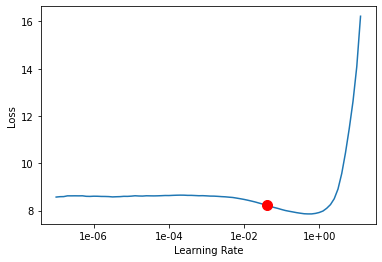

In [20]:
#to find the optimal learning rate
learn.lr_find(start_lr=1e-8, end_lr=1e2)
learn.recorder.plot(suggestion = True)


In [21]:
#fitting the data
learn.fit_one_cycle(2, 5e-2)
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy,time
0,5.336943,5.470152,0.242768,02:00
1,4.523903,5.186217,0.254687,02:02


In [22]:
learn.fit_one_cycle(3, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.390258,5.082936,0.265848,02:23
1,4.076601,4.932741,0.276562,02:22
2,3.469536,4.987715,0.278274,02:23


In [23]:
learn.freeze_to(-1)
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 7.59E-03
Min loss divided by 10: 1.58E-05


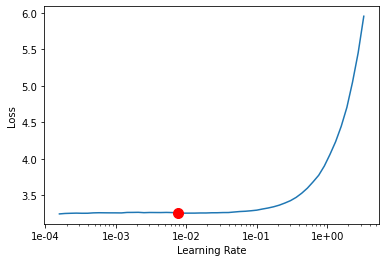

In [24]:
learn.recorder.plot(skip_start=40, suggestion=True)

In [25]:
learn.fit_one_cycle(3, slice(1e-2/(2.6**4), 1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,3.428493,5.028836,0.275298,02:04
1,3.275692,5.024287,0.275923,02:04
2,2.995461,5.037014,0.275938,02:04


In [26]:
learn.freeze_to(-2)
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 6.92E-04
Min loss divided by 10: 1.91E-05


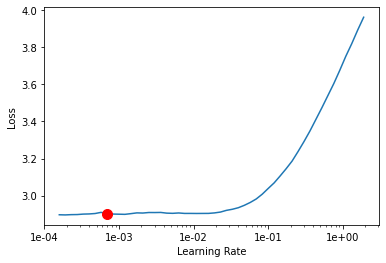

In [27]:
learn.recorder.plot(skip_start=40, suggestion=True)

In [28]:
learn.fit_one_cycle(3, slice(6e-3/(2.6**4), 6e-3))

epoch,train_loss,valid_loss,accuracy,time
0,3.068209,5.188742,0.270045,02:06
1,2.965655,5.201029,0.270342,02:06
2,2.708913,5.275489,0.267872,02:06


In [29]:
#save the encoder model
learn.save_encoder('my_encoder')

In [30]:
# Classifier model data
data_clas = TextClasDataBunch.from_df(path = "", train_df = df, valid_df = df_test, vocab=data_lm.train_ds.vocab, bs=32)

/usr/local/lib/python3.7/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [31]:
#building classifier
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5, metrics=[accuracy, FBeta(beta=1)])

#loading the saved encoder
learn.load_encoder('my_encoder')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (106968 items)
x: TextList
xxbos xxmaj vani xxunk fans hit like solli 500 like xxmaj xxunk xxmaj vendiyathu than,xxbos i love you ajith very i like,xxbos ennaya trailer xxmaj ku mudi xxmaj ellam nikkudhu ... xxmaj vera level trailer ..,xxbos xxmaj vijay xxmaj annaa xxmaj ur xxmaj maa xxrep 6 s xxmaj the xxrep 5 r xxrep 6 i,xxbos நம்ப xxunk நாசாமா தான் போச்சி
y: CategoryList
unknown_state,Positive,Positive,Positive,Negative
Path: .;

Valid: LabelList (4402 items)
x: TextList
xxbos வீர செங்குந்தர் சார்பாக இந்த திரைப்படம் வெற்றி பெற வாழ்த்துக்கள் xxrep 17 . இயக்குனர் மோகன் . g அவர்களுக்கு எங்கள் சமுதாயத்தின் சார்பாக வாழ்த்துக்கள்,xxbos xxmaj xxunk ah irukku xxrep 4 . mokke movie .. waste of time,xxbos manitha samuthaayam xxunk irunthu intha padam vetri adaiya vaalthukal,xxbos xxup jj mam we miss u,xxbos xxmaj subtitle me xxunk dekhne wale like karo
y: CategoryList
Positive,Negative,Positive,Positive,not-Tamil
Path: .;

Test: None, model

epoch,train_loss,valid_loss,accuracy,f_beta,time


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 8.32E-02
Min loss divided by 10: 4.37E-02


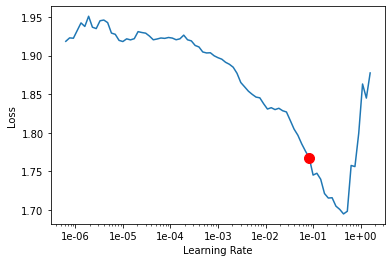

In [32]:
learn.lr_find()
learn.recorder.plot(suggestion=True)


In [33]:
learn.fit_one_cycle(3, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,1.041953,1.041859,0.609723,0.322787,00:58
1,1.038094,0.999847,0.616765,0.000000,00:56
2,1.027750,0.988052,0.619945,0.000000,00:53


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.7/dist-packages/nu

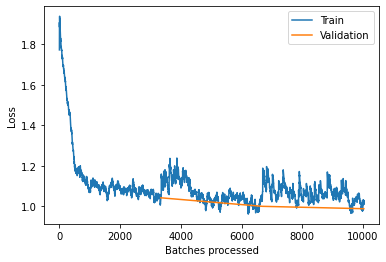

In [34]:
learn.recorder.plot_losses()

epoch,train_loss,valid_loss,accuracy,f_beta,time


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.75E-06
Min loss divided by 10: 2.29E-05


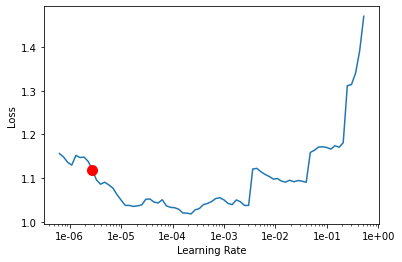

In [35]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [36]:
learn.freeze_to(-2) # unfreeze last 2 layers
learn.fit_one_cycle(2, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.955238,0.985836,0.624716,0.333375,01:05
1,1.002233,0.953582,0.632213,0.000000,01:08


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.7/dist-packages/nu

epoch,train_loss,valid_loss,accuracy,f_beta,time


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 9.12E-07
Min loss divided by 10: 2.29E-03


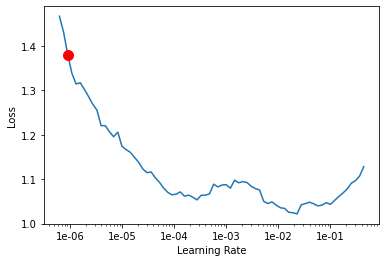

In [37]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [38]:
learn.freeze_to(-3)
learn.fit_one_cycle(2, slice(5.3e-3/(2.6**4),5.31e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.921984,0.941612,0.639255,0.381716,01:52
1,0.908780,0.954110,0.640164,0.000000,01:53


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.7/dist-packages/nu

In [39]:
learn.freeze_to(-4) # unfreeze last 4 layers
learn.fit_one_cycle(2, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))
learn.freeze_to(-5) # unfreeze last 5 layers
learn.fit_one_cycle(2, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

# Unfreezing all the layers and training
learn.unfreeze() # unfreze all
learn.fit_one_cycle(3, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.911648,0.958630,0.645161,0.395859,02:18
1,0.837988,0.947274,0.647433,0.000000,02:17


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.7/dist-packages/nu

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.842845,0.984401,0.634030,0.395347,02:51
1,0.787918,0.989197,0.643117,0.000000,02:42


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.7/dist-packages/nu

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.692034,1.015846,0.636302,0.402657,02:52
1,0.687590,1.032509,0.644480,0.000000,02:45
2,0.673964,1.084930,0.630622,0.000000,02:41


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.7/dist-packages/nu

In [40]:
#getting the predictions
preds, targets = learn.get_preds()
predictions = np.argmax(preds, axis = 1)

In [41]:
pd.crosstab(predictions, targets)

col_0,0,1,2,4,5
row_0,,,,,
0,111,51,89,2,60
1,61,169,128,9,47
2,223,171,2061,43,242
4,24,16,86,173,54
5,51,70,182,17,262


In [42]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
cm=confusion_matrix(predictions,targets)
print(cm)
score = accuracy_score( predictions, targets)
print(score)

[[ 111   51   89    2   60]
 [  61  169  128    9   47]
 [ 223  171 2061   43  242]
 [  24   16   86  173   54]
 [  51   70  182   17  262]]
0.6306224443434802


In [43]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(predictions,targets, zero_division=0, digits=4))

              precision    recall  f1-score   support

           0     0.2362    0.3546    0.2835       313
           1     0.3543    0.4082    0.3793       414
           2     0.8095    0.7522    0.7798      2740
           4     0.7090    0.4901    0.5796       353
           5     0.3940    0.4502    0.4202       582

    accuracy                         0.6306      4402
   macro avg     0.5006    0.4911    0.4885      4402
weighted avg     0.6629    0.6306    0.6432      4402

